In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.signal
import scipy.io.wavfile
import scipy.fft

# funkcje

In [34]:
def fft(X):
	N = len(X)
	if N == 1:
		return X


	even = fft(np.array(X[0::2]))
	odd = fft(np.array(X[1::2]))


	Y = np.zeros(N, dtype=complex)
	for k in range(0, N//2):
		Y[k] = even[k] + np.exp( -2* 1j * np.pi * k / N) * odd[k]
		Y[N//2 + k] = even[k] - np.exp( -2 * 1j * np.pi * k / N) * odd[k]
	return Y

def sinus_signal(hz,N, fs):
	N = np.arange(N)
	Y = np.sin(2*np.pi * N * hz / fs)
	return Y

def mixed_sinus_signal(N, fs , hz, ampl):
	N = np.arange(N)
	Y = np.sum([a*np.sin(2*np.pi * N * freq / fs) for a,freq in zip(ampl,hz)], axis=0)

	return Y

def signal_linspace(fs,n):
	return np.array([(fs/n)*i for i in range(n)])

def wimdo(X):
	X = np.sqrt((np.imag(X))**2 + (np.real(X))**2) / 1024
	return X

def widmo_db(X):
	return 20*np.log10(wimdo(X)/2**10)

def low_pass(X):
	filtr = scipy.signal.firwin(100, 4500, fs=48000)
	X = scipy.signal.lfilter(filtr,1,X)
	return X

def high_pass(X):
	filtr = scipy.signal.firwin(101, 500, fs=48000, pass_zero=False)
	X = scipy.signal.lfilter(filtr,1,X)
	return X

# Zadanie 1

In [4]:
zad1 = fft(sinus_signal(100,2048,4800))
porownanie = np.fft.fft(sinus_signal(100,2048,4800))
dane = {'czy rowne':zad1 == porownanie, 'roznica':abs(zad1 - porownanie), 'wlasne':zad1, 'numpy':porownanie}
wyniki = pd.DataFrame(dane)
wyniki

,czy rowne,roznica,wlasne,numpy
0,True,0.000000e+00,11.875801+0.000000j,11.875801+0.000000j
1,False,7.411934e-15,11.882100+0.155368j,11.882100+0.155368j
2,False,3.662053e-15,11.901036+0.311249j,11.901036+0.311249j
3,False,1.423209e-14,11.932735+0.468160j,11.932735+0.468160j
4,False,2.094765e-15,11.977410+0.626631j,11.977410+0.626631j
...,...,...,...,...
2043,False,1.602571e-14,12.035360-0.787210j,12.035360-0.787210j
2044,False,2.931073e-15,11.977410-0.626631j,11.977410-0.626631j
2045,False,5.881301e-15,11.932735-0.468160j,11.932735-0.468160j
2046,False,7.647656e-15,11.901036-0.311249j,11.901036-0.311249j


# zadanie 2

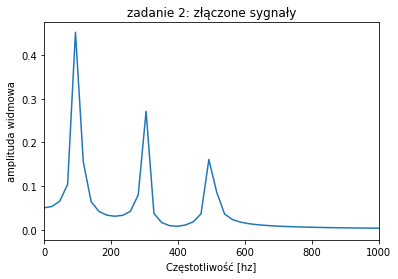

In [42]:
zmieszany = fft(mixed_sinus_signal(2048,48000, [100, 300, 500], [0.5,0.3,0.2]))
plt.plot(signal_linspace(48000,2048), wimdo(zmieszany))
plt.title('zadanie 2: zmieszany sygnał')
plt.xlabel('Częstotliwość [hz]')
plt.ylabel('amplituda widmowa')
plt.xlim(0,1000)
plt.show()

Text(0, 0.5, 'amplituda widmowa')

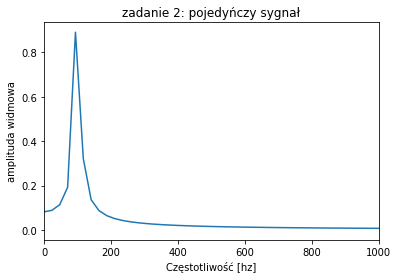

In [43]:
sygnal = fft(sinus_signal(100,2048,48000))
plt.xlim(0,1000)
plt.plot(signal_linspace(48000,2048), wimdo(sygnal))
plt.title('zadanie 2: sygnał 100hz')
plt.xlabel('Częstotliwość [hz]')
plt.ylabel('amplituda widmowa')
plt.show()

# zadanie 3

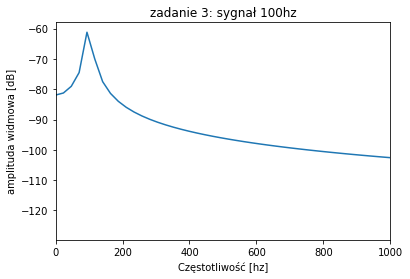

In [67]:
sygnal = scipy.fft.fft(sinus_signal(100,2048,48000))
plt.plot(signal_linspace(48000,2048), widmo_db(sygnal))
plt.xlim(0,1000)
plt.title('zadanie 3: sygnał 100hz')
plt.xlabel('Częstotliwość [hz]')
plt.ylabel('amplituda widmowa [dB]')
plt.show()

Text(0, 0.5, 'amplituda widmowa [dB]')

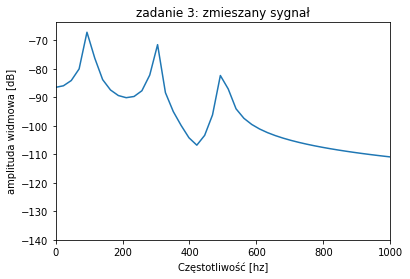

In [68]:
zmieszany = scipy.fft.fft(mixed_sinus_signal(2048,48000, [100, 300, 500], [0.5,0.3,0.1]))
plt.plot(signal_linspace(48000,2048), widmo_db(zmieszany))
plt.xlim(0,1000)
plt.title('zadanie 3: zmieszany sygnał')
plt.xlabel('Częstotliwość [hz]')
plt.ylabel('amplituda widmowa [dB]')

# Zadanie 4

C:\Users\Leniu\AppData\Local\Temp\ipykernel_7176\367637632.py:2: UserWarning: Only one segment is calculated since parameter NFFT (=2048) >= signal length (=2048).
  plt.specgram(zmieszany, NFFT=2048,Fs=48000)


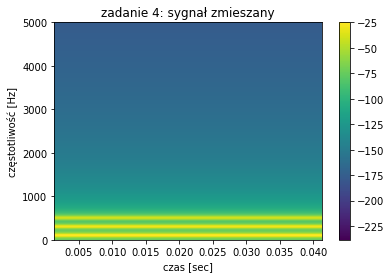

In [65]:
zmieszany = mixed_sinus_signal(2048,48000, [100, 300, 500], [0.5,0.3,0.1])
plt.specgram(zmieszany, NFFT=2048,Fs=48000)
plt.colorbar()
plt.title('zadanie 4: sygnał zmieszany')
plt.ylabel('częstotliwość [Hz]')
plt.xlabel('czas [sec]')
plt.ylim(0, 5000)
plt.show()

C:\Users\Leniu\AppData\Local\Temp\ipykernel_7176\322879654.py:2: UserWarning: Only one segment is calculated since parameter NFFT (=2048) >= signal length (=2048).
  plt.specgram(sygnal, NFFT=2048,Fs=48000)


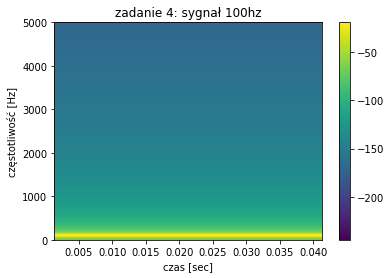

In [70]:
sygnal = sinus_signal(100,2048,48000)
plt.specgram(sygnal, NFFT=2048,Fs=48000)
plt.colorbar()
plt.title('zadanie 4: sygnał 100hz')
plt.ylabel('częstotliwość [Hz]')
plt.xlabel('czas [sec]')
plt.ylim(0, 5000)
plt.show()

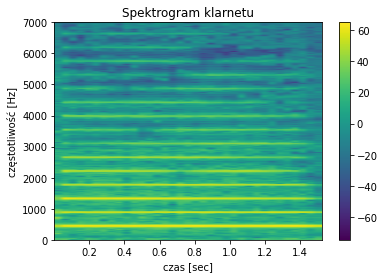

In [71]:
wav_fs,klatnet = scipy.io.wavfile.read('klarnet.wav')
plt.specgram(klatnet,Fs=wav_fs, NFFT=2048)
plt.ylabel('częstotliwość [Hz]')
plt.xlabel('czas [sec]')
plt.title('Spektrogram klarnetu')
plt.ylim(0, 7000)
plt.colorbar()
plt.show()

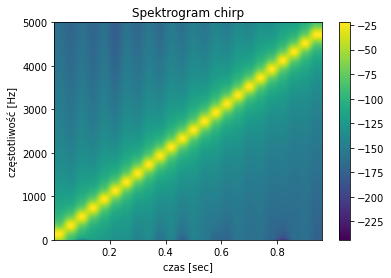

In [72]:
sygnal_chirp = scipy.signal.chirp(np.arange(48000) / 48000,f0=20,t1=1 ,f1=5000, method='linear')
plt.specgram(sygnal_chirp, NFFT=2048,Fs=48000)
plt.colorbar()
plt.title('Spektrogram chirp')
plt.ylabel('częstotliwość [Hz]')
plt.xlabel('czas [sec]')
plt.ylim(0,5000)
plt.show()

# Zad 5

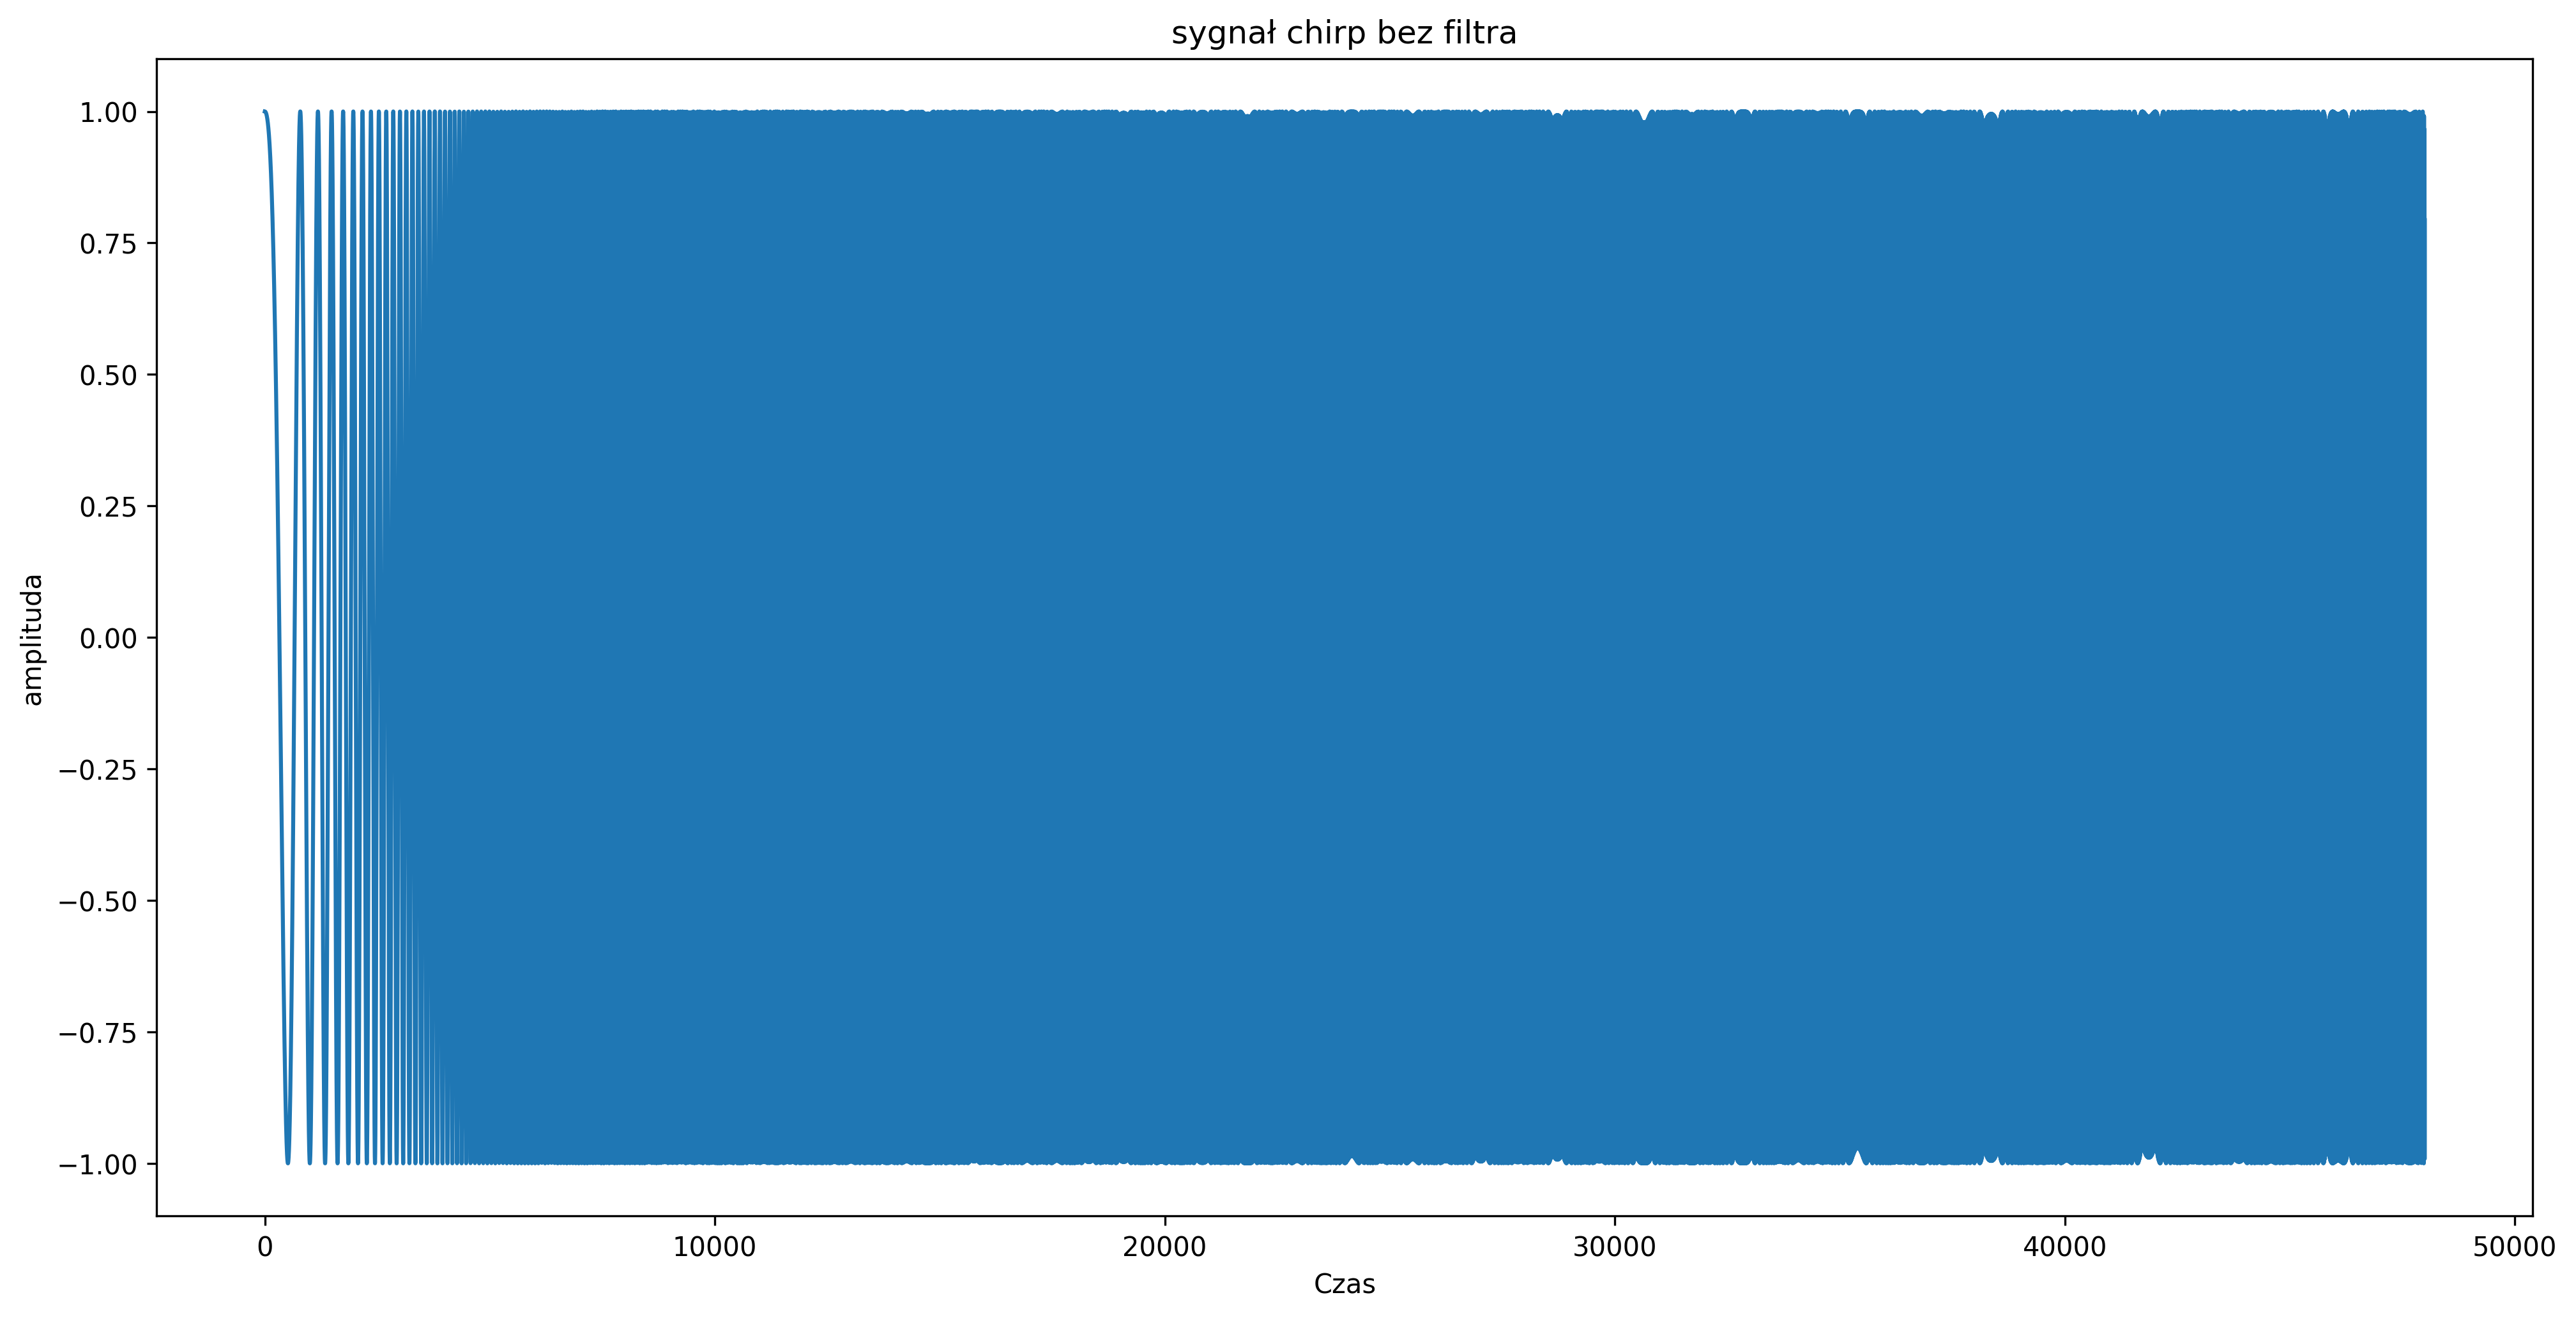

In [73]:
np.seterr(divide = 'ignore')

plt.figure(figsize=(16,8), dpi=300)
plt.plot(signal_linspace(48000,48000), sygnal_chirp)
plt.title('sygnał chirp bez filtra')
plt.xlabel('Czas')
plt.ylabel('amplituda')
plt.show()

C:\Users\Leniu\AppData\Roaming\Python\Python310\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


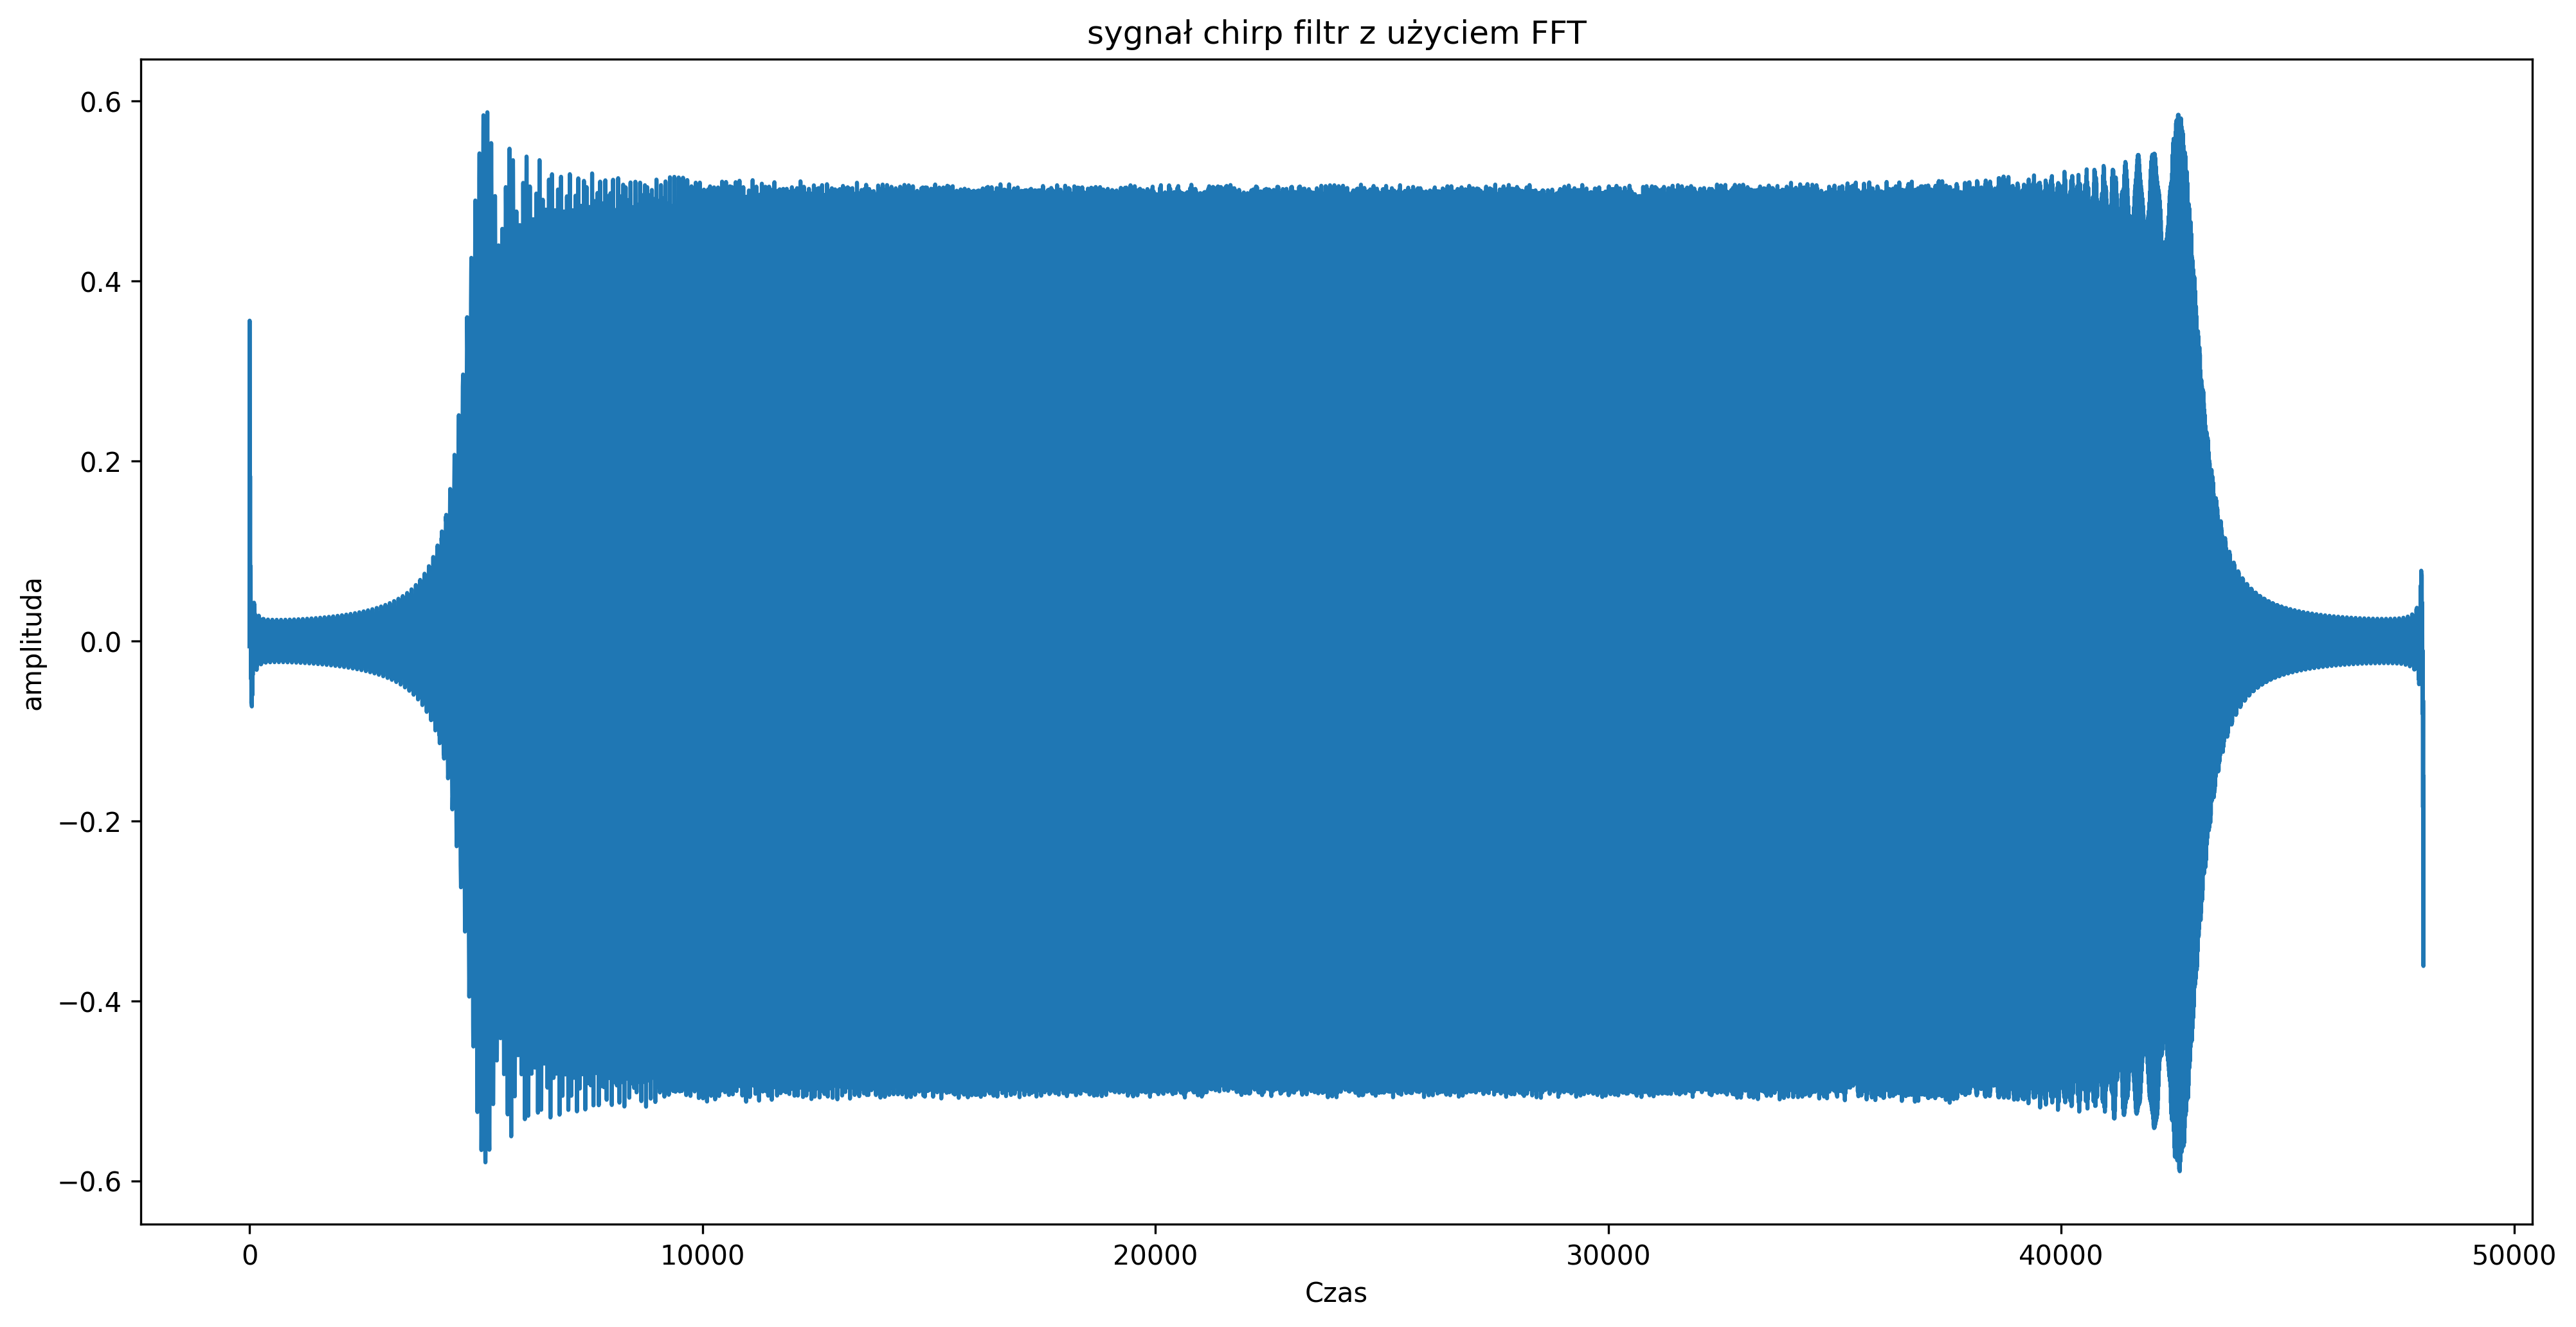

In [74]:

widmo_chirp = scipy.fft.fft(sygnal_chirp)
widmo_chirp2 = [widmo_chirp[i] if 500< i < 4500 else 0 for i in range(len(widmo_chirp))]
plt.figure(figsize=(16,8), dpi=300)
plt.plot(np.arange(len(widmo_chirp2)),scipy.fft.ifft(widmo_chirp2))
plt.title('sygnał chirp filtr z użyciem FFT')
plt.xlabel('Czas')
plt.ylabel('amplituda')
plt.show()

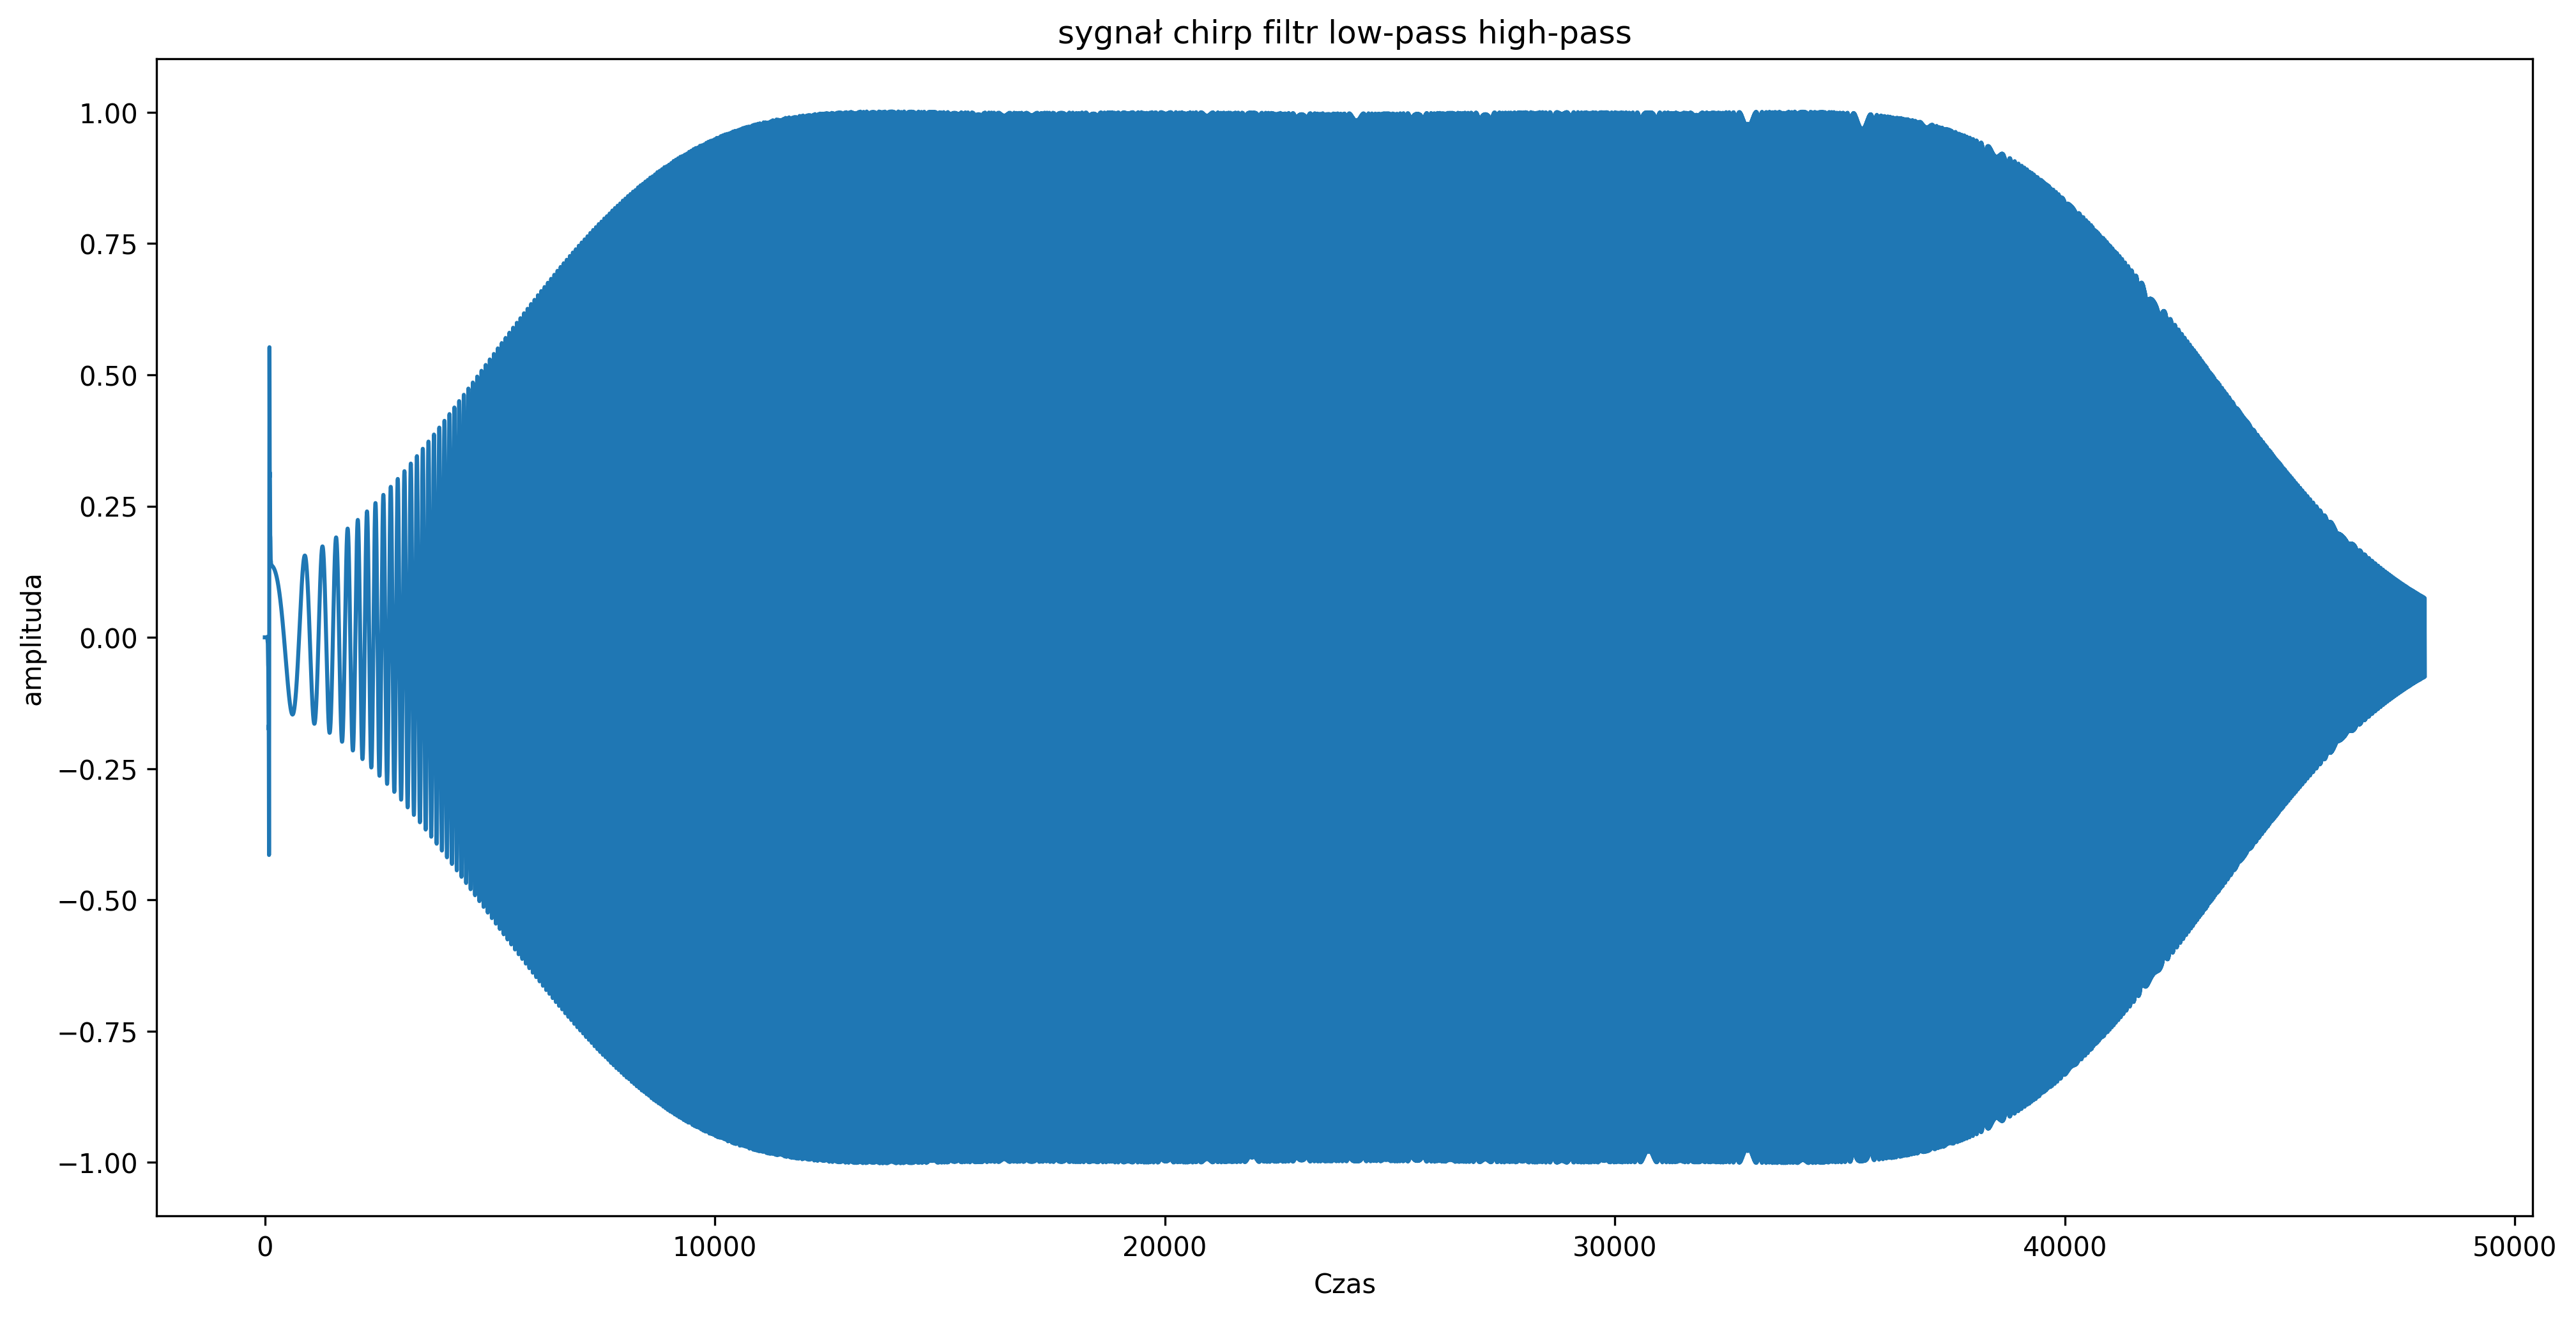

In [75]:
low_pass_chirp = low_pass(sygnal_chirp)
low_pass_high_pass_chirp = high_pass(low_pass_chirp)
plt.figure(figsize=(16,8), dpi=300)
plt.plot(np.arange(len(widmo_chirp2)),low_pass_high_pass_chirp)
plt.title('sygnał chirp filtr low-pass high-pass')
plt.xlabel('Czas')
plt.ylabel('amplituda')
plt.show()